In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

import requests
from bs4 import BeautifulSoup

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
team_abb={'Everton':'EVE', 'Aston Villa':'AVL',
          'Leicester City':'LEI', 'Arsenal':'ARS',
          'Liverpool':'LIV','Tottenham':'TOT', 
          'Chelsea':'CHE', 'Leeds United':'LEE', 
          'Newcastle Utd':'NEW','West Ham':'WHU', 
          'Southampton':'SOU', 'Crystal Palace':'CRY', 
          'Wolves':'WOL','Manchester City':'MCI', 
          'Brighton':'BHA', 'Manchester Utd':'MUN', 
          'Watford':'WAT','Burnley':'BUR', 
          'Brentford':'BRE', 'Norwich City':'NOR'}

In [22]:
#To be executed once for gameweek
"""
url='https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
r=requests.get(url)

soup=BeautifulSoup(r.text, 'html.parser')
table=soup.find('table')
rows=table.find_all('tr')

headers=['GW',
 'Day',
 'Date',
 'Time',
 'Home',
 'xG_Home',
 'Score',
 'xG_Away',
 'Away',
 'Attendance',
 'Venue',
 'Referee',
 'Match Report',
 'Notes']

data=[]
for row in rows[1:]:
    if row.find('th').text !='':
        temp=[]
        temp.append(int(row.find('th').text))
        temp.extend([x.text for x in row.find_all('td')])
        data.append(temp)

df=pd.DataFrame(data, columns=headers)
df=df[['GW', 'Date','Home', 'Away', 'xG_Home', 'xG_Away', 'Score']]

def score_splitter(x,h='h'):
    if x=='':
        return 0
    else:
        if h=='h':
            return int(x.split('–')[0])
        else:
            return int(x.split('–')[1])

df["G_Home"]=df.Score.apply(lambda x: score_splitter(x))
df["G_Away"]=df.Score.apply(lambda x: score_splitter(x, h='a'))

df.Home=df.Home.apply(lambda x:team_abb[x])
df.Away=df.Away.apply(lambda x:team_abb[x])
df.drop(['Score','Date'], axis=1, inplace=True)
df.to_csv('xg_data.csv', index=None)
df.head()
"""

'\nurl=\'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures\'\nr=requests.get(url)\n\nsoup=BeautifulSoup(r.text, \'html.parser\')\ntable=soup.find(\'table\')\nrows=table.find_all(\'tr\')\n\nheaders=[\'GW\',\n \'Day\',\n \'Date\',\n \'Time\',\n \'Home\',\n \'xG_Home\',\n \'Score\',\n \'xG_Away\',\n \'Away\',\n \'Attendance\',\n \'Venue\',\n \'Referee\',\n \'Match Report\',\n \'Notes\']\n\ndata=[]\nfor row in rows[1:]:\n    if row.find(\'th\').text !=\'\':\n        temp=[]\n        temp.append(int(row.find(\'th\').text))\n        temp.extend([x.text for x in row.find_all(\'td\')])\n        data.append(temp)\n\ndf=pd.DataFrame(data, columns=headers)\ndf=df[[\'GW\', \'Date\',\'Home\', \'Away\', \'xG_Home\', \'xG_Away\', \'Score\']]\n\ndef score_splitter(x,h=\'h\'):\n    if x==\'\':\n        return 0\n    else:\n        if h==\'h\':\n            return int(x.split(\'–\')[0])\n        else:\n            return int(x.split(\'–\')[1])\n\ndf["G_Home"]=df.Score.apply(lambda

In [37]:
df=pd.read_csv('xg_data.csv')
df.head()

,GW,Home,Away,xG_Home,xG_Away,G_Home,G_Away
0,1,BRE,ARS,1.3,1.4,2,0
1,1,MUN,LEE,1.5,0.6,5,1
2,1,LEI,WOL,0.8,1.1,1,0
3,1,BUR,BHA,1.0,1.3,1,2
4,1,WAT,AVL,1.2,1.1,3,2


In [38]:
def xG_converter(x):
    try:
        return float(x)
    except:
        return 0
df.xG_Away=df.xG_Away.apply(lambda x:xG_converter(x))
df.xG_Home=df.xG_Home.apply(lambda x:xG_converter(x))

In [39]:
df['GD']=df.G_Home-df.G_Away
df['Pts_Home']=df.GD.apply(lambda x : 3 if x>0 else (0 if x<0 else 1))
df['Pts_Away']=df.GD.apply(lambda x : 0 if x>0 else (3 if x<0 else 1))
df.head()

,GW,Home,Away,xG_Home,xG_Away,G_Home,G_Away,GD,Pts_Home,Pts_Away
0,1,BRE,ARS,1.3,1.4,2,0,2,3,0
1,1,MUN,LEE,1.5,0.6,5,1,4,3,0
2,1,LEI,WOL,0.8,1.1,1,0,1,3,0
3,1,BUR,BHA,1.0,1.3,1,2,-1,0,3
4,1,WAT,AVL,1.2,1.1,3,2,1,3,0


In [40]:
gw_last=12
gw_next=gw_last+1

In [41]:
df_temp=pd.DataFrame({'Team':list(team_abb.values())})
df_temp['M_h']=df_temp.Team\
.apply(lambda x:df[df.Home==x][df.GW<gw_next].count()[0])

df_temp['M_a']=df_temp.Team\
.apply(lambda x:df[df.Away==x][df.GW<gw_next].count()[0])

df_temp['M']=df_temp.M_h+df_temp.M_a

df_temp['W_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD>0).sum())

df_temp['D_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD==0).sum())

df_temp['L_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD<0).sum())

df_temp['W_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD<0).sum())

df_temp['D_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD==0).sum())

df_temp['L_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD>0).sum())

df_temp['W']=df_temp.W_h+df_temp.W_a
df_temp['L']=df_temp.L_h+df_temp.L_a
df_temp['D']=df_temp.D_h+df_temp.D_a

df_temp['xG_h']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['xG_a']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['xG']=df_temp.xG_a+df_temp.xG_h

df_temp['xGpm_h']=df_temp.xG_h/df_temp.M_h
df_temp['xGpm_a']=df_temp.xG_a/df_temp.M_a
df_temp['xGpm']=df_temp.xG/df_temp.M

df_temp['xGA_h']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['xGA_a']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['xGA']=df_temp.xGA_a+df_temp.xGA_h

df_temp['xGApm_h']=df_temp.xGA_h/df_temp.M_h
df_temp['xGApm_a']=df_temp.xGA_a/df_temp.M_a
df_temp['xGApm']=df_temp.xGA/df_temp.M

df_temp['delta_xGpm']=df_temp.xGpm-df_temp.xGApm


df_temp['P_h']=df_temp.Team\
.apply(lambda x:df.Pts_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['P_a']=df_temp.Team\
.apply(lambda x:df.Pts_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['P']=df_temp.P_a+df_temp.P_h

df_temp['Ppm_h']=df_temp.P_h/df_temp.M_h
df_temp['Ppm_a']=df_temp.P_a/df_temp.M_a
df_temp['Ppm']=df_temp.P/df_temp.M

df_temp['G_h']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['G_a']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['G']=df_temp.G_a+df_temp.G_h

df_temp['GA_h']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['GA_a']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['GA']=df_temp.GA_a+df_temp.GA_h

df_temp['GD']=df_temp.G-df_temp.GA

In [42]:
def predict_xg(df_fix):
    df_fix['G_home']=0.0
    df_fix['G_away']=0.0

    for i in range(df_fix.shape[0]):
        df_fix.G_home[i]=(df_temp.xGpm[df_temp.Team==df_fix.Home[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Away[i]].sum())/2
        df_fix.G_away[i]=(df_temp.xGpm[df_temp.Team==df_fix.Away[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Home[i]].sum())/2

    df_fix['GD']=df_fix['G_home']-df_fix['G_away']
    df_fix['GS']=df_fix['G_home']+df_fix['G_away']
    df_fix=df_fix.sort_values(by='GD', ascending=False)
    return df_fix

df_fix=df[df.GW>gw_last].iloc[:,:3].reset_index()
df_fix=predict_xg(df_fix)

df_fix['Match']=df_fix.Home+" Vs "+df_fix.Away


#df_result=pd.read_csv("xg_data.csv")
df_result=df
df_result=df_result[df_result.GW==gw_next]

#Name Preprocess
#df_result.Home=df_result.Home.apply(lambda x: team_abb[x])
#df_result.Away=df_result.Away.apply(lambda x: team_abb[x])

df_result['Match']=df_result.Home+" Vs "+df_result.Away
df_result["act_GD"]=df_result.G_Home-df_result.G_Away
df_result["act_xGD"]=df_result.xG_Home-df_result.xG_Away

df_result["pred_xG_Home"]=df_result.Match\
.apply(lambda x:df_fix.G_home[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result["pred_xG_Away"]=df_result.Match\
.apply(lambda x:df_fix.G_away[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result["pred_xGD"]=df_result.Match\
.apply(lambda x:df_fix.GD[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result['xG_diff']=abs(df_result.pred_xGD-df_result.act_xGD)
df_result['abs_pred_xGD']=abs(df_result.pred_xGD)
df_result.sort_values(by='xG_diff', ascending=True, inplace=True)
#df_result

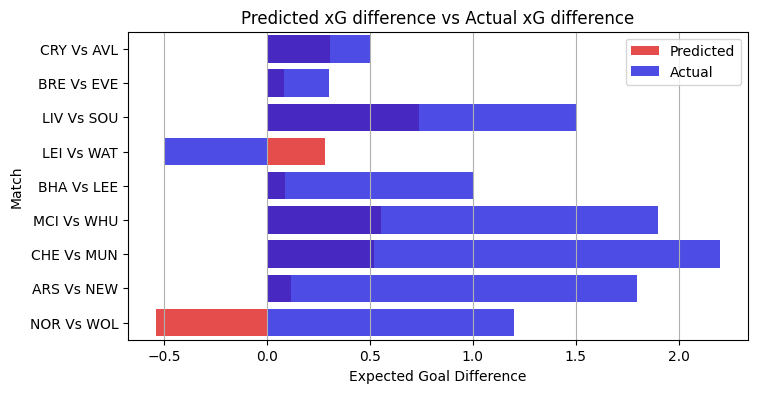

In [43]:
plt.style.use('default')
plt.figure(figsize=(8,4))
plt.title("Predicted xG difference vs Actual xG difference")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="Predicted")
sns.barplot(y='Match', x='act_xGD', orient='h', data=df_result, color='blue', alpha=0.8
            , label="Actual")
plt.xlabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.grid(axis='x')
plt.savefig('pred_vs_act_prev.png')
plt.show()

In [44]:
gw_last=gw_last+1
gw_next=gw_last+1

In [45]:
df_temp=pd.DataFrame({'Team':list(team_abb.values())})
df_temp['M_h']=df_temp.Team\
.apply(lambda x:df[df.Home==x][df.GW<gw_next].count()[0])

df_temp['M_a']=df_temp.Team\
.apply(lambda x:df[df.Away==x][df.GW<gw_next].count()[0])

df_temp['M']=df_temp.M_h+df_temp.M_a

df_temp['W_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD>0).sum())

df_temp['D_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD==0).sum())

df_temp['L_h']=df_temp.Team\
.apply(lambda x:(df[df.Home==x][df.GW<gw_next].GD<0).sum())

df_temp['W_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD<0).sum())

df_temp['D_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD==0).sum())

df_temp['L_a']=df_temp.Team\
.apply(lambda x:(df[df.Away==x][df.GW<gw_next].GD>0).sum())

df_temp['W']=df_temp.W_h+df_temp.W_a
df_temp['L']=df_temp.L_h+df_temp.L_a
df_temp['D']=df_temp.D_h+df_temp.D_a

df_temp['xG_h']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['xG_a']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['xG']=df_temp.xG_a+df_temp.xG_h

df_temp['xGpm_h']=df_temp.xG_h/df_temp.M_h
df_temp['xGpm_a']=df_temp.xG_a/df_temp.M_a
df_temp['xGpm']=df_temp.xG/df_temp.M

df_temp['xGA_h']=df_temp.Team\
.apply(lambda x:df.xG_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['xGA_a']=df_temp.Team\
.apply(lambda x:df.xG_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['xGA']=df_temp.xGA_a+df_temp.xGA_h

df_temp['xGApm_h']=df_temp.xGA_h/df_temp.M_h
df_temp['xGApm_a']=df_temp.xGA_a/df_temp.M_a
df_temp['xGApm']=df_temp.xGA/df_temp.M

df_temp['delta_xGpm']=df_temp.xGpm-df_temp.xGApm


df_temp['P_h']=df_temp.Team\
.apply(lambda x:df.Pts_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['P_a']=df_temp.Team\
.apply(lambda x:df.Pts_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['P']=df_temp.P_a+df_temp.P_h

df_temp['Ppm_h']=df_temp.P_h/df_temp.M_h
df_temp['Ppm_a']=df_temp.P_a/df_temp.M_a
df_temp['Ppm']=df_temp.P/df_temp.M

df_temp['G_h']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Home==x][df.GW<gw_next].sum())

df_temp['G_a']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Away==x][df.GW<gw_next].sum())

df_temp['G']=df_temp.G_a+df_temp.G_h

df_temp['GA_h']=df_temp.Team\
.apply(lambda x:df.G_Away[df.Home==x][df.GW<gw_next].sum())

df_temp['GA_a']=df_temp.Team\
.apply(lambda x:df.G_Home[df.Away==x][df.GW<gw_next].sum())

df_temp['GA']=df_temp.GA_a+df_temp.GA_h

df_temp['GD']=df_temp.G-df_temp.GA_a

In [46]:
live_tbl=df_temp[['Team','M','W','D','L','P','GD','G','GA' ]].sort_values(by=['P','GD'], ascending=False)\
.style.background_gradient(cmap='RdYlGn',subset=['GD','G','GA']).hide_index()
dfi.export(live_tbl,"live_tbl.png")
live_tbl

Team,M,W,D,L,P,GD,G,GA
CHE,13,9,3,1,30,30,31,5
MCI,13,9,2,2,29,23,27,7
LIV,13,8,4,1,28,33,39,11
WHU,13,7,2,4,23,17,24,16
ARS,13,7,2,4,23,4,15,17
WOL,13,6,2,5,20,6,12,12
TOT,12,6,1,5,19,2,11,17
MUN,13,5,3,5,18,10,21,22
LEI,13,5,3,5,18,9,20,23
BHA,13,4,6,3,18,6,12,14


In [47]:
df_fix=df[df.GW>gw_last].iloc[:,:3].reset_index()

def predict_xg(df_fix):
    df_fix['G_home']=0.0
    df_fix['G_away']=0.0

    for i in range(df_fix.shape[0]):
        df_fix.G_home[i]=(df_temp.xGpm[df_temp.Team==df_fix.Home[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Away[i]].sum())/2
        df_fix.G_away[i]=(df_temp.xGpm[df_temp.Team==df_fix.Away[i]].sum()+
                       df_temp.xGApm[df_temp.Team==df_fix.Home[i]].sum())/2

    df_fix['GD']=df_fix['G_home']-df_fix['G_away']
    df_fix['GS']=df_fix['G_home']+df_fix['G_away']
    df_fix=df_fix.sort_values(by='GD', ascending=False)
    return df_fix

df_fix=predict_xg(df_fix)

df_styled=df_fix.iloc[:,1:][df_fix.GW==gw_next].style.background_gradient(cmap='RdYlGn',subset=['GD','GS']).hide_index()
dfi.export(df_styled,"nxt_week.png")
df_styled

GW,Home,Away,G_home,G_away,GD,GS
14,WOL,BUR,1.40545,1.17821,0.227244,2.58365
14,WHU,BHA,1.29231,1.14231,0.15,2.43462
14,SOU,LEI,1.49615,1.40769,0.0884615,2.90385
14,NEW,NOR,1.32692,1.31923,0.00769231,2.64615
14,MUN,ARS,1.48077,1.49231,-0.0115385,2.97308
14,TOT,BRE,1.12244,1.27372,-0.151282,2.39615
14,LEE,CRY,1.12692,1.44231,-0.315385,2.56923
14,WAT,CHE,1.11923,1.88462,-0.765385,3.00385
14,EVE,LIV,1.19231,2.01154,-0.819231,3.20385
14,AVL,MCI,0.815385,1.78846,-0.973077,2.60385


In [48]:
gw_dict={}
for i in range(1,7):
    gw_dict.update({str("GW"+str(gw_last+i)):gw_last+i})


df_fdr=pd.DataFrame({'Team':df_temp.Team})

for GW in gw_dict.keys():
    temp_df=df_fix[df_fix.GW==gw_dict[GW]]

    df_fdr[GW]=df_fdr.Team\
    .apply(lambda x:(temp_df[temp_df.Home==x].GD.sum()) 
           if x in (temp_df.Home.unique()) 
           else -temp_df[temp_df.Away==x].GD.sum())
    
sc=MinMaxScaler()
df_fdr['Mean']=df_fdr.mean(axis=1)
for col in gw_dict.keys():
    df_fdr[col]=sc.fit_transform(np.array(df_fdr[col]).reshape(-1,1))
df_fdr=df_fdr.sort_values(by='Mean', ascending=False)
df_fdr=df_fdr.style.background_gradient(cmap='RdYlGn',
                                 subset=list(gw_dict.keys()))
dfi.export(df_fdr,"fdr.png")
df_fdr

,Team,GW14,GW15,GW16,GW17,GW18,GW19,Mean
13,MCI,1,1,0.898467,0.893417,1,0.928571,0.977564
4,LIV,0.920949,0.885714,1,1,0.86388,1,0.957906
6,CHE,0.893281,0.660714,0.82567,0.694357,0.70418,0.832046,0.565385
11,CRY,0.662055,0.644643,0.568966,0.547022,0.678457,0.595238,0.249573
18,BRE,0.577734,0.628571,0.693487,0.611285,0.532154,0.559846,0.214316
9,WHU,0.577075,0.339286,0.684068,0.619122,0.728296,0.554054,0.186592
10,SOU,0.545455,0.519643,0.591954,0.452978,0.467846,0.445946,0.0025641
14,BHA,0.422925,0.480357,0.515964,0.496865,0.564309,0.440154,-0.0222222
15,MUN,0.494071,0.355357,0.62069,0.388715,0.435691,0.617761,-0.0455128
3,ARS,0.505929,0.425,0.408046,0.380878,0.506431,0.627413,-0.0596154


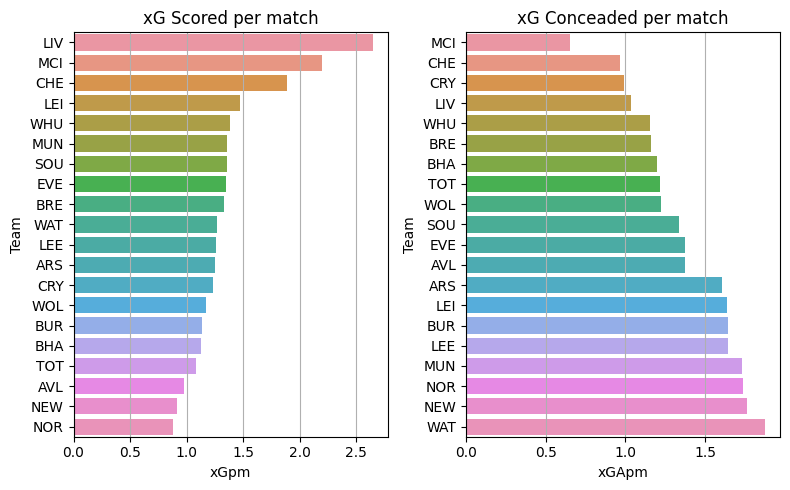

In [49]:
plt.figure(figsize=(8,5))
#plt.suptitle("EPL 2020/21 SEASON UPTO GW4")

plt.subplot(1,2,1)
plt.title("xG Scored per match")
sns.barplot(orient='h', x='xGpm',y='Team',
            data=df_temp.sort_values(by='xGpm',ascending=False))
plt.grid(which='both', axis='x')

plt.subplot(1,2,2)
plt.title("xG Conceaded per match")
sns.barplot(orient='h', x='xGApm',y='Team',
            data=df_temp.sort_values(by='xGApm',ascending=True))
plt.grid(which='both', axis='x')

plt.tight_layout()
plt.savefig('xg_xa.png')
plt.show()

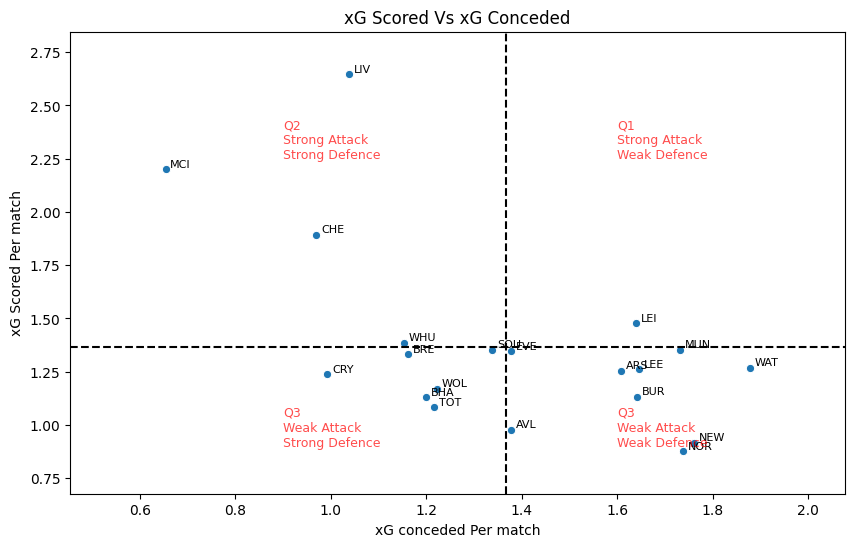

In [50]:
plt.figure(figsize=(10,6))
plt.title("xG Scored Vs xG Conceded")
sns.scatterplot(data=df_temp, x='xGApm', y='xGpm')
for i in range(df_temp.shape[0]):
    plt.text(df_temp.xGApm[i]+0.01, df_temp.xGpm[i]+0.01, 
             df_temp.Team[i], fontdict={'fontsize':8})
plt.xlabel("xG conceded Per match")
plt.ylabel("xG Scored Per match")
#plt.plot([0,3],[0,3],'r--')
plt.xlim(df_temp.xGApm.min()-0.2,df_temp.xGApm.max()+0.2)
plt.ylim(df_temp.xGpm.min()-0.2,df_temp.xGpm.max()+0.2)
plt.axhline(y=df_temp.xGpm.mean(),ls='--', color='k')
plt.axvline(x=df_temp.xGApm.mean(),ls='--', color='k')

plt.text(x=1.6, y=2.25, s="Q1\nStrong Attack\nWeak Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=0.9, y=2.25, s="Q2\nStrong Attack\nStrong Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=0.9, y=0.9, s="Q3\nWeak Attack\nStrong Defence", 
         alpha=0.7,fontsize=9, color='red')
plt.text(x=1.6, y=0.9, s="Q3\nWeak Attack\nWeak Defence", 
         alpha=0.7,fontsize=9, color='red')

plt.savefig('scatter_xg_xa.png')
plt.show()

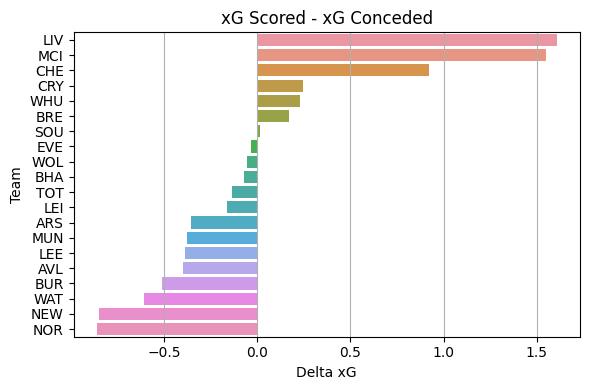

In [51]:
plt.figure(figsize=(6,4))
plt.title("xG Scored - xG Conceded")
sns.barplot(orient='h', x='delta_xGpm',y='Team', 
            data=df_temp.sort_values(by='delta_xGpm', ascending=False))
plt.grid(which='both', axis='x')
plt.xlabel('Delta xG')
plt.tight_layout()
plt.savefig('delta_xg.png')
plt.show()

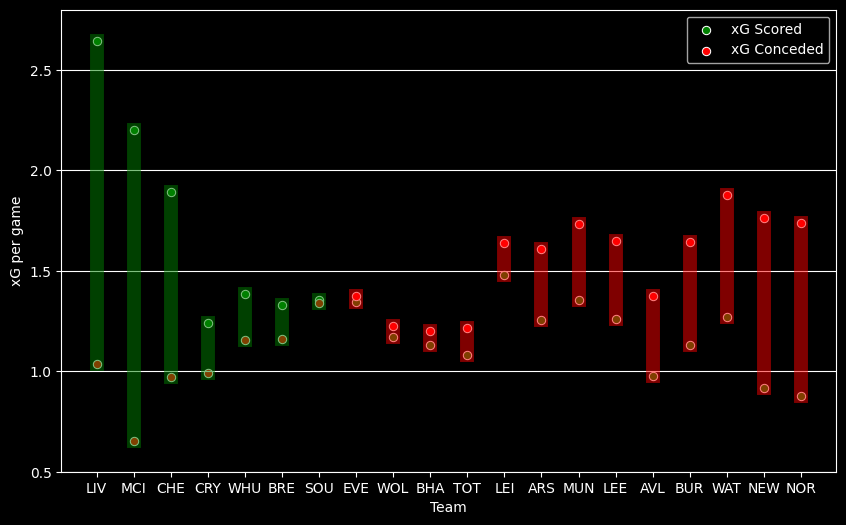

In [52]:

data=df_temp.sort_values(by='delta_xGpm',ascending=False).reset_index()

y_max=round(max(data.xGpm.append(data.xGApm)),1)+0.2
y_min=round(min(data.xGpm.append(data.xGApm)),1)-0.2

plt.style.use('dark_background')
plt.figure(figsize=(10,6))

for i in range (data.shape[0]):
    if data.delta_xGpm[i]>0:
        c=str('green')
    else:
        c=str('red')
    plt.axvline(x=data.Team[i],ymax=(data.xGpm[i]-y_min)/(y_max-y_min),
                ymin=(data.xGApm[i]-y_min)/(y_max-y_min), color=c, linewidth=10, alpha=0.5, markersize=10)

sns.scatterplot(data=data,
               x='Team',y='xGpm', color='g', label='xG Scored')
sns.scatterplot(data=data,
               x='Team',y='xGApm',color='r', label='xG Conceded')
plt.ylim(y_min,y_max)
plt.ylabel('xG per game')
plt.grid(axis='y')
plt.savefig('xg-xapm.png')
plt.show()

In [53]:
df_fix['Match']=df_fix.Home+" Vs "+df_fix.Away


#df_result=pd.read_csv("xg_data.csv")
df_result=df
df_result=df_result[df_result.GW==gw_next]

#Name Preprocess
#df_result.Home=df_result.Home.apply(lambda x: team_abb[x])
#df_result.Away=df_result.Away.apply(lambda x: team_abb[x])

df_result['Match']=df_result.Home+" Vs "+df_result.Away
df_result["act_GD"]=df_result.G_Home-df_result.G_Away
df_result["act_xGD"]=df_result.xG_Home-df_result.xG_Away

df_result["pred_xG_Home"]=df_result.Match\
.apply(lambda x:df_fix.G_home[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result["pred_xG_Away"]=df_result.Match\
.apply(lambda x:df_fix.G_away[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result["pred_xGD"]=df_result.Match\
.apply(lambda x:df_fix.GD[df_fix.Match==x][df_fix.GW==gw_next].sum())

df_result['xG_diff']=abs(df_result.pred_xGD-df_result.act_xGD)
df_result['abs_pred_xGD']=abs(df_result.pred_xGD)
df_result.sort_values(by='abs_pred_xGD', ascending=False, inplace=True)
#df_result

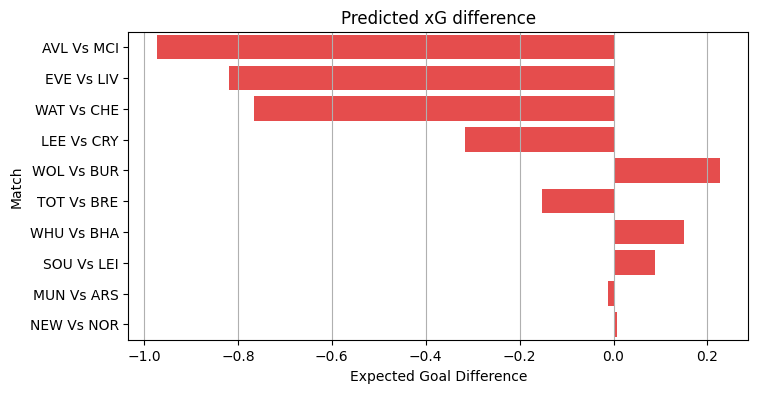

In [54]:
plt.style.use('default')
plt.figure(figsize=(8,4))
plt.title("Predicted xG difference")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=df_result, color='red', alpha=0.8
            , label="Predicted")
plt.xlabel("Expected Goal Difference")
plt.grid(axis='x')
plt.savefig('pred_vs_act.png')
plt.show()